# Метаинформация

Система хранения: Samsung MZVLB512HBJQ-000L2

Процессор: Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz

In [1]:
import pandas as pd
pd.__version__

'1.2.4'

In [2]:
import time

In [3]:
start = time.time()
df = pd.read_csv('steam_reviews.csv')
print('Время: ', round((time.time() - start)/60, 2), " минут.")

Время:  2.85  минут.


In [10]:
df.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [72]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned   

In [4]:
df['language'].value_counts()

english       9635437
schinese      3764967
russian       2348900
brazilian      837524
spanish        813320
german         752596
turkish        635868
koreana        613632
french         541751
polish         495529
tchinese       218203
czech          133980
italian        133307
thai           127503
japanese        81754
portuguese      81386
swedish         80226
dutch           77555
hungarian       71001
latam           70103
danish          55915
finnish         54712
norwegian       36797
romanian        32730
ukrainian       21169
greek           14472
bulgarian       10454
vietnamese       6580
Name: language, dtype: int64

# Настройка данных

**Выберем отзывы на английском языке:**

In [6]:
eng_reviews = df[df["language"] == 'english']

In [23]:
eng_reviews.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9635437 entries, 3 to 21747369
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned    

**Избавимся от ненужных для выполнения поставленной задачи аргументов:**

In [4]:
start = time.time()
eng_reviews = df[df["language"] == 'english']
eng_reviews = eng_reviews.drop(["Unnamed: 0", "app_id", "review_id", "language", "timestamp_created", "timestamp_updated",
                                "comment_count", "steam_purchase", "received_for_free", "written_during_early_access",
                               "author.steamid", "author.num_games_owned", "author.num_reviews", "author.playtime_forever",
                               "author.playtime_last_two_weeks", "author.playtime_at_review", "author.last_played",
                               "app_name", "votes_helpful", "votes_funny", "weighted_vote_score"], axis = 1)
print('Время: ', round((time.time() - start)/60, 2), " минут.")

Время:  0.07  минут.


In [6]:
eng_reviews.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9635437 entries, 3 to 21747369
Data columns (total 2 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review       object
 1   recommended  bool  
dtypes: bool(1), object(1)
memory usage: 2.7 GB


In [5]:
eng_reviews.head()

,review,recommended
3,"One of the best RPG's of all time, worthy of a...",True
5,"good story, good graphics. lots to do.",True
6,"dis gud,",True
18,favorite game of all time cant wait for the Ne...,True
20,Why wouldn't you get this,True


## Преподготовка текста

In [6]:
import re
re.__version__

'2.2.1'

In [7]:
def cleanup(text):
    text = str(text).lower()
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub('\W+',' ', text)
    return text

In [8]:
start = time.time()
X = eng_reviews['review'].apply(cleanup)
print('Время: ', round((time.time() - start)/60, 2), " минут.")

Время:  3.25  минут.


In [9]:
X.head()

3     one of the best rpg of all time worthy of any ...
5                  good story good graphics lots to do 
6                                              dis gud 
18    favorite game of all time cant wait for the ne...
20                           why would not you get this
Name: review, dtype: object

In [10]:
Y = eng_reviews['recommended']

In [11]:
import sklearn
sklearn.__version__

'0.24.1'

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
start = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print('Время: ', round((time.time() - start)/60, 2), " минут.")

Время:  0.06  минут.


**Создание словаря:**

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

start = time.time()
vec = TfidfVectorizer()
vec.fit(X_train)
print('Время: ', round((time.time() - start)/60, 2), " минут.")

Время:  3.11  минут.


**Векторизация текстовых данных:**

In [16]:

train_feature = vec.transform(X_train)
test_feature = vec.transform(X_test)


Время:  4.69  минут.


**Количество уникальных слов (размер словаря):**

In [17]:
train_feature.shape[1]

938419

# Построение нулевой модели:

* без оптимизатора
* без учета соотношения положительных и отрицательных отзывов
* без сведения к корню и исключения служебных слов

In [24]:
from sklearn.linear_model import LogisticRegression

In [38]:
model0 = LogisticRegression()
model0.fit(train_feature, y_train)

C:\Users\ivevv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Набор данных ***слишком большой***.

# Построение первой модели:

* с оптимизатором
* без учета соотношения положительных и отрицательных отзывов
* без сведения к корню и исключения служебных слов

In [22]:
import time

In [50]:
start = time.time()
model1 = LogisticRegression(solver = 'sag')
model1.fit(train_feature, y_train)
print('Время обучения модели: ', round((time.time() - start)/60, 2), " минут.")

Время обучения модели:  3.17  минут.


### Оценка модели

In [28]:
from sklearn import metrics

In [51]:
y_pred = model1.predict(test_feature)
print('F-score: ', round(metrics.f1_score(y_test, y_pred), 2))

F-score:  0.97


### Матрица ошибок

In [27]:
import matplotlib.pyplot as plt

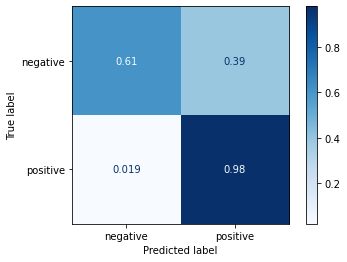

In [64]:
metrics.plot_confusion_matrix(model1, test_feature, y_test, display_labels=['negative', 'positive'],
                              cmap = plt.cm.Blues, normalize = 'true')

Заметим, что полученная модель в 40% случаев ошибается при классификации негативных отзывов.

**Почему?**

Посмотрим соотношение негативных и позитивных отзывов в анализируемых данных.

In [34]:
import seaborn as sns
sns.__version__

'0.11.1'

C:\Users\ivevv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='recommended', ylabel='count'>

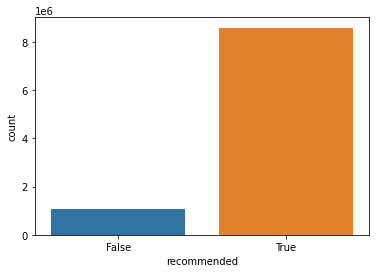

In [66]:
sns.countplot(eng_reviews['recommended'])

Соотношение отзывов явно неравное. Попробуем уравновесить это в следующей модели.

# Построение второй модели:

* с оптимизатором
* с учетом соотношения положительных и отрицательных отзывов путем применения параметра *stratify*
* без сведения к корню и исключения служебных слов

In [18]:
start = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 42)
print('Время: ', round((time.time() - start)/60, 2), " минут.")

Время:  0.1  минут.


In [19]:
start = time.time()
vec = TfidfVectorizer()
vec.fit(X_train)
print('Время: ', round((time.time() - start)/60, 2), " минут.")

Время:  3.1  минут.


In [20]:
start = time.time()
train_feature = vec.transform(X_train)
test_feature = vec.transform(X_test)
print('Время: ', round((time.time() - start)/60, 2), " минут.")

Время:  4.77  минут.


In [28]:
start = time.time()
model2 = LogisticRegression(solver = 'sag')
model2.fit(train_feature, y_train)
print('Время обучения модели: ', round((time.time() - start)/60, 2), " минут.")

Время обучения модели:  2.88  минут.


### Оценка модели

In [29]:
y_pred = model2.predict(test_feature)
print('F-score: ', round(metrics.f1_score(y_test, y_pred), 2))

F-score:  0.97


### Матрица ошибок

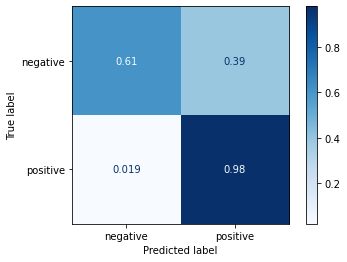

In [30]:
metrics.plot_confusion_matrix(model2, test_feature, y_test, display_labels=['negative', 'positive'],
                              cmap = plt.cm.Blues, normalize = 'true')

Заметим, что применение параметра *stratify* не повлияло на работу модели.

Попробуем уравновесить соотношение данных путем андерсемплинга класса положительных отзывов.

# Построение третьей модели:

* с оптимизатором
* с учетом соотношения положительных и отрицательных отзывов путем андерсемплинга
* без сведения к корню и исключения служебных слов

In [21]:
from imblearn.under_sampling import RandomUnderSampler

In [22]:
us = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = us.fit_resample(train_feature, y_train)

In [25]:
start = time.time()
model3 = LogisticRegression(solver = 'sag')
model3.fit(X_under, y_under)
print('Время обучения модели: ', round((time.time() - start)/60, 2), " минут.")

Время обучения модели:  0.68  минут.


### Оценка модели

In [29]:
y_pred = model3.predict(test_feature)
print('F-score: ', round(metrics.f1_score(y_test, y_pred), 2))

F-score:  0.94


### Матрица ошибок

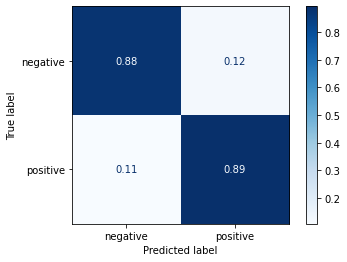

In [30]:
metrics.plot_confusion_matrix(model3, test_feature, y_test, display_labels=['negative', 'positive'],
                              cmap = plt.cm.Blues, normalize = 'true')

Несмотря на то, что точность классификации немного упала, теперь модель одинаково точно определяет негативные и позитивные отзывы.

## Визуализация полученных результатов

Посмотрим какие слова имеют наибольшее значение при классификации отзывов на положительные и отрицательные.

In [31]:
import numpy as np
np.__version__

'1.20.1'

In [32]:
feat_imp = model3.coef_[0]
sorted_idx = np.argsort(feat_imp)

C:\Users\ivevv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


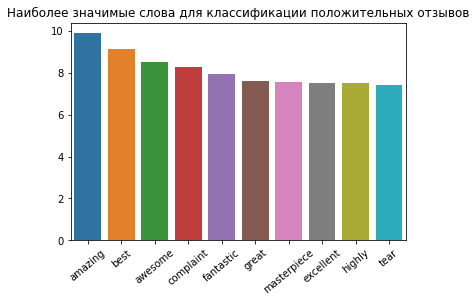

In [35]:
most_pos = [list(vec.vocabulary_.keys())[list(vec.vocabulary_.values()).index(w)] for w in sorted_idx[range(-1, -11, -1)]]
vis = sns.barplot(most_pos, feat_imp[sorted_idx[range(-1,-11, -1)]])
plt.title("Наиболее значимые слова для классификации положительных отзывов")
plt.xticks(rotation = 40)
plt.show()

C:\Users\ivevv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


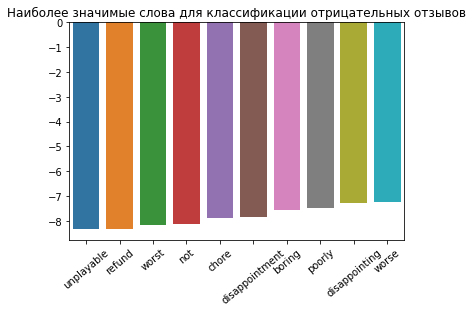

In [87]:
most_neg = [list(vec.vocabulary_.keys())[list(vec.vocabulary_.values()).index(w)] for w in sorted_idx[:10]]
vis = sns.barplot(most_neg, feat_imp[sorted_idx[:10]])
plt.title("Наиболее значимые слова для классификации отрицательных отзывов")
plt.xticks(rotation = 40)
plt.show()

Посмотрим, влияет ли стемминг (сведение к корню) и исключение служебных слов на точность классификации.

Продолжим при этом использовать андерсемплинг.

# Построение четвертой модели:

* с оптимизатором
* с учетом соотношения положительных и отрицательных отзывов путем андерсемплинга
* со стеммингом и исключением служебных слов

**Преподготовка текста:**

In [33]:
import nltk
nltk.__version__

'3.6.1'

In [34]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [35]:
pst = PorterStemmer()
sw = set(stopwords.words("english"))

In [36]:
def stem_stop(text):
    words = word_tokenize(text)
    text = []
    for w in words:
        if w not in sw:
            text.append(pst.stem(w))
    return text

In [37]:
X = X.apply(stem_stop)

RecursionError: maximum recursion depth exceeded in comparison

Ошибка рекурсии при применении стеммера может быть вызвана тем, что в каком-то из анализируемых отзывов присутсвует аномально длинное слово (например, пользователь не ставил пробелы между словами в предложении).

Пока откажемся от стемминга.

Воспользуемся встроенным параметром TF-IDF векторайзера для исключения служебных слов.

In [88]:
vec = TfidfVectorizer(stop_words = 'english')
vec.fit(X_train)

TfidfVectorizer(stop_words='english')

In [89]:
train_feature = vec.transform(X_train)
test_feature = vec.transform(X_test)

In [90]:
X_under, y_under = us.fit_resample(train_feature, y_train)

In [91]:
start = time.time()
model4 = LogisticRegression(solver = 'sag')
model4.fit(X_under, y_under)
print('Время обучения модели: ', round((time.time() - start)/60, 2), " минут.")

Время обучения модели:  0.57  минут.


## Оценка модели

In [92]:
y_pred = model4.predict(test_feature)
print('F-score: ', round(metrics.f1_score(y_test, y_pred), 2))

F-score:  0.93


## Матрица ошибок

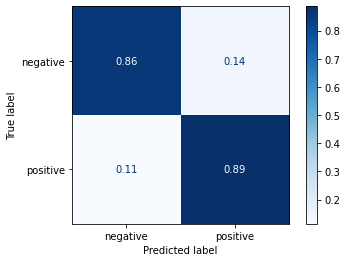

In [93]:
metrics.plot_confusion_matrix(model4, test_feature, y_test, display_labels=['negative', 'positive'],
                              cmap = plt.cm.Blues, normalize = 'true')

Заметим, что при исключении служебных слов модель становится чуть менее точной при классификации негативных отзывов. Причиной этому может быть то, что отрицательная частица *not* считается служебным словом ("стоп-словом") и исключается из текста.

## Визуализация полученных результатов

Посмотрим какие слова имеют наибольшее значение при классификации отзывов на положительные и отрицательные.

In [94]:
feat_imp = model4.coef_[0]
sorted_idx = np.argsort(feat_imp)

C:\Users\ivevv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


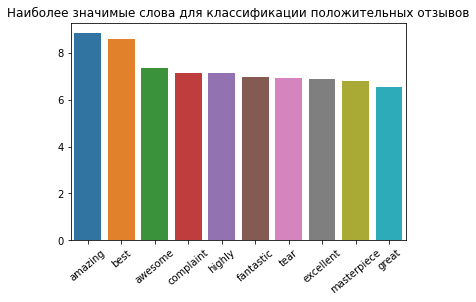

In [95]:
most_pos = [list(vec.vocabulary_.keys())[list(vec.vocabulary_.values()).index(w)] for w in sorted_idx[range(-1, -11, -1)]]
vis = sns.barplot(most_pos, feat_imp[sorted_idx[range(-1,-11, -1)]])
plt.title("Наиболее значимые слова для классификации положительных отзывов")
plt.xticks(rotation = 40)
plt.show()

C:\Users\ivevv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


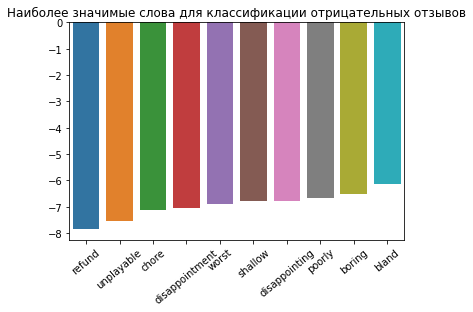

In [96]:
most_neg = [list(vec.vocabulary_.keys())[list(vec.vocabulary_.values()).index(w)] for w in sorted_idx[:10]]
vis = sns.barplot(most_neg, feat_imp[sorted_idx[:10]])
plt.title("Наиболее значимые слова для классификации отрицательных отзывов")
plt.xticks(rotation = 40)
plt.show()

Наконец, попробуем учесть при составлении словаря и векторизации не только отдельные слова, но и наборы из двух слов с помощью параметра ngram_range.

# Построение пятой модели:

* с оптимизатором
* с учетом соотношения положительных и отрицательных отзывов путем андерсемплинга
* с включением в словарь наборов из двух слов (биграм)

In [36]:
start = time.time()
vec = TfidfVectorizer(ngram_range = (1, 2))
vec.fit(X_train)
print('Время: ', round((time.time() - start)/60, 2), " минут.")

Время:  9.27  минут.


In [37]:
start = time.time()
train_feature = vec.transform(X_train)
test_feature = vec.transform(X_test)
print('Время: ', round((time.time() - start)/60, 2), " минут.")

Время:  14.95  минут.


In [38]:
train_feature.shape[1]

16649174

Размер словаря увеличился почти в два раза.

In [39]:
X_under, y_under = us.fit_resample(train_feature, y_train)

In [ ]:
start = time.time()
model5 = LogisticRegression(solver = 'sag')
model5.fit(X_under, y_under)
print('Время обучения модели: ', round((time.time() - start)/60, 2), " минут.")

## Оценка модели

In [53]:
y_pred = model5.predict(test_feature)
print('F-score: ', round(metrics.f1_score(y_test, y_pred), 2))

F-score:  0.95


## Матрица ошибок

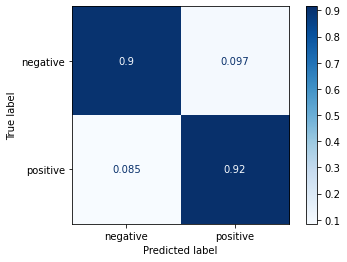

In [55]:
metrics.plot_confusion_matrix(model5, test_feature, y_test, display_labels=['negative', 'positive'],
                              cmap = plt.cm.Blues, normalize = 'true')

Можно заметить, что включение в словарь биграм повысило точность модели.

## Визуализация полученных результатов

Посмотрим какие слова и сочетания слов имеют наибольшее значение при классификации отзывов на положительные и отрицательные.

In [59]:
feat_imp = model5.coef_[0]
sorted_idx = np.argsort(feat_imp)

C:\Users\ivevv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


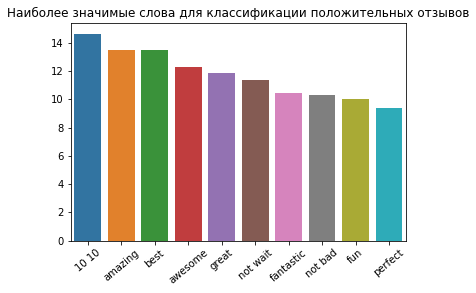

In [68]:
most_pos = [list(vec.vocabulary_.keys())[list(vec.vocabulary_.values()).index(w)] for w in sorted_idx[range(-1, -11, -1)]]
vis = sns.barplot(most_pos, feat_imp[sorted_idx[range(-1,-11, -1)]])
plt.title("Наиболее значимые слова для классификации положительных отзывов")
plt.xticks(rotation = 40)
plt.show()

C:\Users\ivevv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


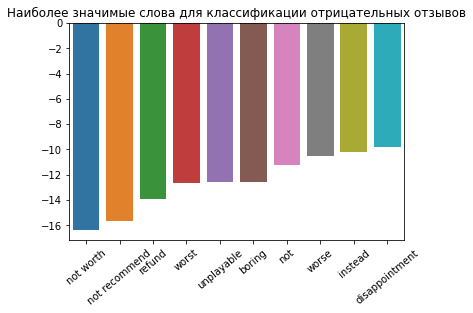

In [69]:
most_neg = [list(vec.vocabulary_.keys())[list(vec.vocabulary_.values()).index(w)] for w in sorted_idx[:10]]
vis = sns.barplot(most_neg, feat_imp[sorted_idx[:10]])
plt.title("Наиболее значимые слова для классификации отрицательных отзывов")
plt.xticks(rotation = 40)
plt.show()